# Importing dependencies

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("../Data/Churn_Modelling.csv")

In [21]:
df.shape

(10000, 14)

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
df.duplicated().sum()

0

In [25]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [26]:
# df['Geography'].unique()
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [27]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [28]:
df2 = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Converting categorical data into numerical data using Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtypes != "float64":
        df2[col] = le.fit_transform(df2[col])
df2.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,459,2,0,25,2,125510.82,0,1,1,79084.10,0


In [31]:
X = df2.drop(columns=['Exited'])
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [32]:
X_train.shape

(8000, 10)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[-0.23180395,  0.30531046,  0.91509065, ..., -1.55337352,
         0.97725852,  0.42739449],
       [-0.25252744, -0.90503826, -1.09278791, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [-0.39759191,  0.30531046, -1.09278791, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 0.22411294, -0.90503826, -1.09278791, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 0.13085721, -0.90503826, -1.09278791, ...,  0.64376017,
         0.97725852,  0.01781218],
       [ 1.16703196,  0.30531046,  0.91509065, ...,  0.64376017,
        -1.02327069, -1.15822478]])

# Importing dependencies for building ANN model

In [37]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Adding layers

In [38]:
# Building neural network model
model = Sequential()

num_of_nodesInHiddenLayer = 11
num_of_nodesInOutputLayer = 1

# First hidden layer
# Activation function can be 'sigmoid', 'relu' and so on. 'relu' performs better than sigmoid in hidden layers
model.add(Dense(num_of_nodesInHiddenLayer, activation= 'sigmoid', input_dim = 10))

# Second hidden layer
model.add(Dense(num_of_nodesInHiddenLayer, activation= 'sigmoid'))

# Output layer
model.add(Dense(num_of_nodesInOutputLayer, activation= 'sigmoid'))

model.summary()

D:\code\cuda\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             121 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265 (1.04 KB)

 Trainable params: 265 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model and training perceptrons

In [39]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [40]:
# The accuracy and the validation accuracy both needs to increase and the loss needs to decrease.
# Too many epochs can lead to overfitting issue.
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5200 - loss: 0.6806 - val_accuracy: 0.7975 - val_loss: 0.5015
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.4859 - val_accuracy: 0.7975 - val_loss: 0.4873
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4814 - val_accuracy: 0.7975 - val_loss: 0.4755
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.4731 - val_accuracy: 0.7975 - val_loss: 0.4635
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4607 - val_accuracy: 0.7975 - val_loss: 0.4529
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7978 - loss: 0.4432 - val_accuracy: 0.8019 - val_loss: 0.4456
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7999 - loss: 0.4427 - val_accuracy: 0.8075 - val_loss: 0.4414
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8131 - loss: 0.4315 - val_accu

# Visualization

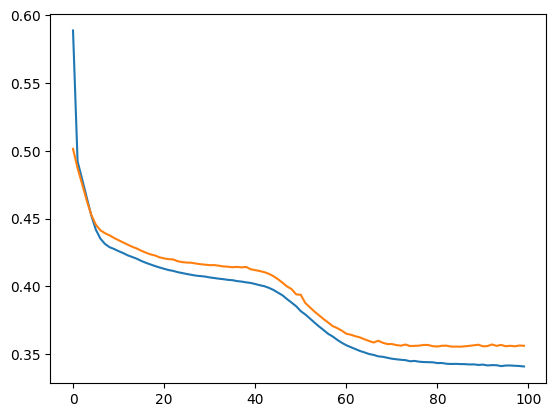

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

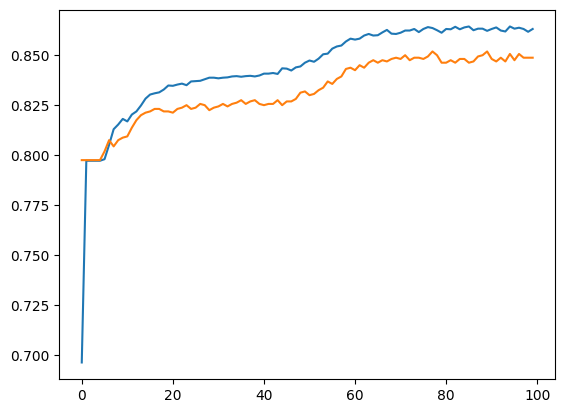

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [43]:
# The value of weights and bias
model.layers[0].get_weights()

[array([[ 0.10439058,  0.21867889, -0.11245677,  0.4019482 ,  0.16949607,
         -0.2546878 , -0.03412334,  0.08089074, -0.33501488,  0.07985612,
         -0.11641151],
        [-0.1218743 , -1.0063199 , -0.0194224 , -0.09971747,  0.48745903,
         -0.14148639,  0.01378229,  0.06868941, -0.02785777, -0.03321587,
          0.20713392],
        [-0.01118591, -0.08318813, -1.0551108 ,  0.2876053 , -0.1447152 ,
         -0.2930673 ,  0.2394772 , -0.01718564,  0.21430774,  0.19623968,
         -0.22182406],
        [-1.3756149 , -2.106554  , -0.6033922 , -1.6609151 , -1.8995575 ,
         -0.66504186,  0.52685356, -0.48848593,  0.2303046 , -0.9158987 ,
         -2.275368  ],
        [-0.39690766, -0.17890288, -0.20461594, -0.01335414,  0.13233508,
         -0.11117929,  0.17861682,  0.00430393, -0.25217724, -0.13204361,
          0.1180006 ],
        [ 0.27850875,  0.17294015,  0.7676683 , -1.0000951 ,  0.17610762,
         -0.1087459 , -0.3040032 ,  0.724362  ,  0.19383834, -0.3540951

In [44]:
# The actual value of predicted score
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


# Converting the predicted score between 0 and 1

In [45]:
# The converted value of predicted score because the sigmoid function provides a probability
y_pred = np.where(y_log > 0.5, 1, 0)

# Calculating the accuracy score

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.856